In [1]:
import signac
import numpy as np
import matplotlib.pyplot as plt
import freud
import gsd
import hoomd
import gsd.pygsd
import gsd.hoomd
from scipy.stats import linregress

In [2]:
project = signac.get_project("workspace")
for job in project:
    print(job)

fe36ee4052a01cae041ef5988477de10


In [3]:
state_dict = {"size":"medium", "process":"quench"}

job_path = project.find_jobs(state_dict)

job_list = project.find_jobs(state_dict)

In [4]:
for job in job_path:
    msd_path = job.fn("msd.log")
    print (msd_path)

/Users/emilyepstein/Projects/ptb7-itic/workspace/fe36ee4052a01cae041ef5988477de10/msd.log


In [5]:
def atom_type_pos(frame, atom_types): 
    positions = []
    for idx, type_id in enumerate(frame.particles.typeid):
        if frame.particles.types[type_id] in atom_types:
            positions.append(frame.particles.position[idx])
    return positions

In [6]:
def msd_slope(job_path, step_size = 25, atom_types='all'):  
    msd = np.genfromtxt(job_path, names=True, delimiter="\t")
    x = msd['timestep'][-3000::step_size]
    y = msd[atom_types][-3000::step_size]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, y, color = '#ffc08a')
    plt.plot(x, x*slope + intercept, linestyle = 'dotted', color = "#e6aa77")
    plt.xlabel("timestep") 
    plt.ylabel("msd") 
    #plt.xscale("log") 
    plt.title(state_dict)
    print("slope is:")
    print("%10.5e"% slope)
    plt.show()         
    return x, y, slope, intercept


In [7]:
def slope_of_jobs(job_list):
    for job in job_list:
        #job_path = job.workspace()
        if msd_path:
            x, y, slope, intercept = msd_slope(msd_path)

slope is:
1.48317e-06


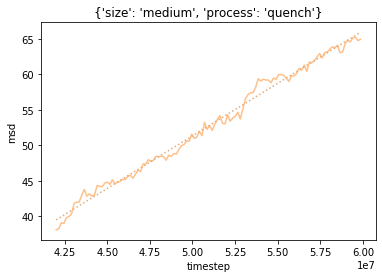

In [8]:
slope_of_jobs(job_path)